# ANN with Keras

## Setup

In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Building an image classifier

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.1'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

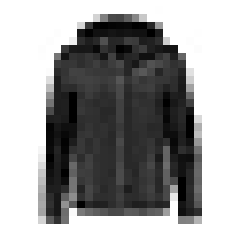

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

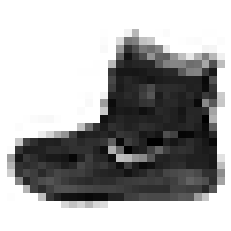

In [17]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

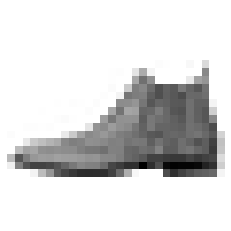

In [18]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
X_valid.shape

(5000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

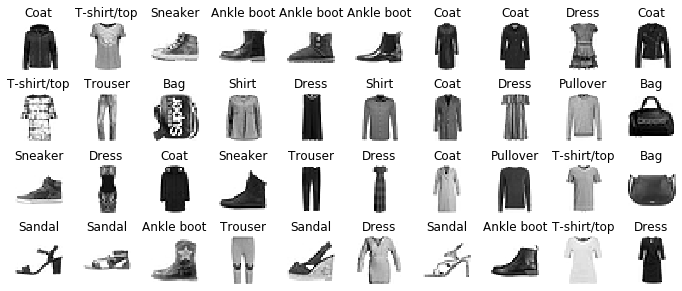

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a model

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
keras.backend.clear_session()
np.random.seed(42)

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.0156356 , -0.04567308,  0.02110419, ...,  0.00116738,
         0.06175703,  0.06208965],
       [ 0.07309   , -0.06912801,  0.0391838 , ...,  0.03920981,
         0.0160448 ,  0.01135897],
       [ 0.02180497,  0.04248131, -0.03751983, ..., -0.0478642 ,
         0.04118524,  0.03327627],
       ...,
       [-0.01418461,  0.02433734, -0.04970773, ..., -0.01565827,
        -0.04256624, -0.05678456],
       [-0.04877016, -0.03788848, -0.07234613, ...,  0.01530088,
        -0.00457599, -0.06397817],
       [ 0.06421143,  0.0149515 , -0.04249312, ..., -0.04711424,
        -0.06170864,  0.04763363]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

## Compile the model

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Train the model

In [37]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7033 - accuracy: 0.7741 - val_loss: 0.4984 - val_accuracy: 0.8368
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4814 - accuracy: 0.8340 - val_loss: 0.4515 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4399 - accuracy: 0.8470 - val_loss: 0.4079 - val_accuracy: 0.8636
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.8560 - val_loss: 0.3933 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3907 - accuracy: 0.8634 - val_loss: 0.3781 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8688 - val_loss: 0.3899 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3629 - accuracy: 0.8720 - val_loss: 0.3649 - val_accuracy:

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot learning curves

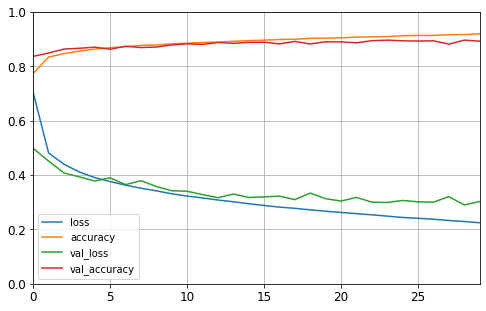

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8811


[0.333279013633728, 0.8810999989509583]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

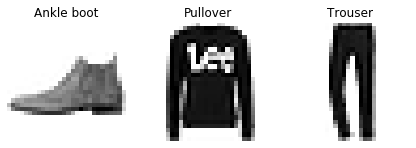

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercises

### 1) Plot learning curves when using different optimizers

#### Optimizer: RMSprop

In [56]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [57]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4304 - accuracy: 0.8467 - val_loss: 0.4421 - val_accuracy: 0.8552
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3717 - accuracy: 0.8699 - val_loss: 0.3671 - val_accuracy: 0.8828
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3539 - accuracy: 0.8794 - val_loss: 0.4689 - val_accuracy: 0.8664
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3460 - accuracy: 0.8828 - val_loss: 0.3587 - val_accuracy: 0.8832
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3364 - accuracy: 0.8853 - val_loss: 0.4060 - val_accuracy: 0.8770
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3305 - accuracy: 0.8896 - val_loss: 0.3910 - val_accuracy: 0.8844
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3260 - accuracy: 0.8912 - val_loss: 0.4384 - val_accuracy:

In [58]:
history1.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

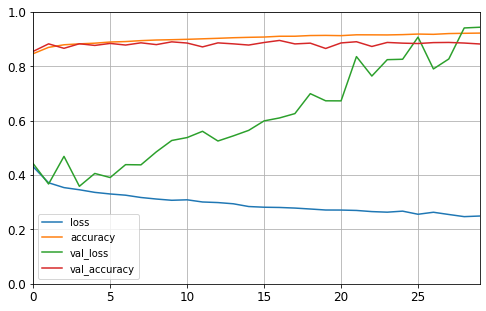

In [59]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7674 - accuracy: 0.8817


[0.7674245834350586, 0.8816999793052673]

#### Optimizer: Nadam

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [62]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2660 - accuracy: 0.9153 - val_loss: 0.6108 - val_accuracy: 0.8882
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2425 - accuracy: 0.9205 - val_loss: 0.5108 - val_accuracy: 0.8874
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2255 - accuracy: 0.9218 - val_loss: 0.5060 - val_accuracy: 0.8898
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2168 - accuracy: 0.9254 - val_loss: 0.4531 - val_accuracy: 0.8878
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2021 - accuracy: 0.9287 - val_loss: 0.4808 - val_accuracy: 0.8872
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2037 - accuracy: 0.9283 - val_loss: 0.4922 - val_accuracy: 0.8884
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1945 - accuracy: 0.9296 - val_loss: 0.4685 - val_accuracy:

In [63]:
history2.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

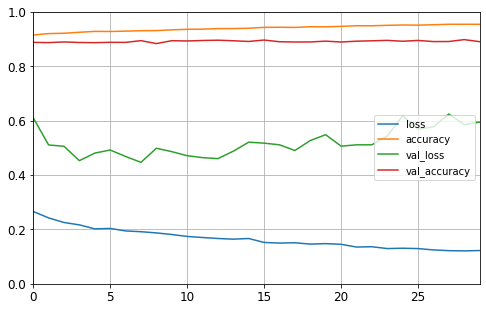

In [64]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.8890


[0.5541219711303711, 0.8889999985694885]

#### Optimizer: Momentum

In [70]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3033 - accuracy: 0.1003 - val_loss: 2.3052 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0994 - val_loss: 2.3035 - val_accuracy: 0.0986
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3034 - accuracy: 0.0964 - val_loss: 2.3038 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3034 - accuracy: 0.0988 - val_loss: 2.3045 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0982 - val_loss: 2.3046 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0975 - val_loss: 2.3034 - val_accuracy:

In [72]:
history3.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

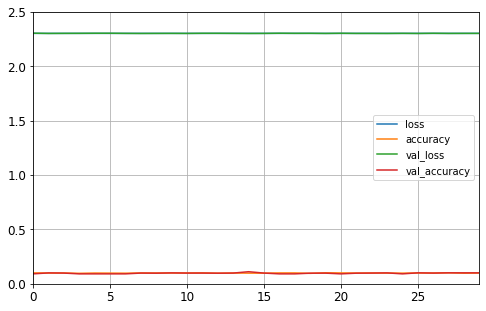

In [78]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [74]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3030 - accuracy: 0.1000


[2.302997589111328, 0.10000000149011612]

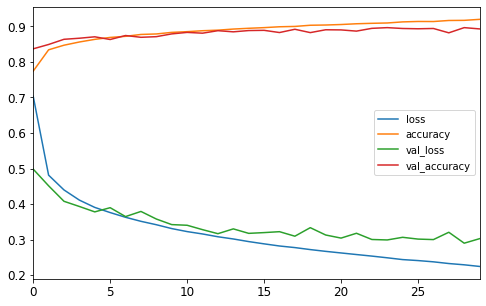

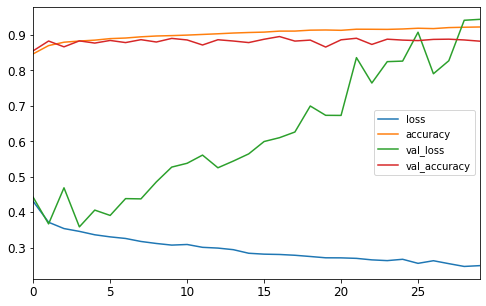

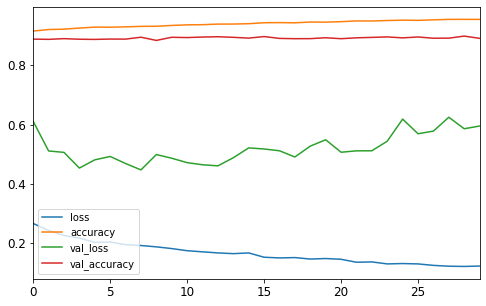

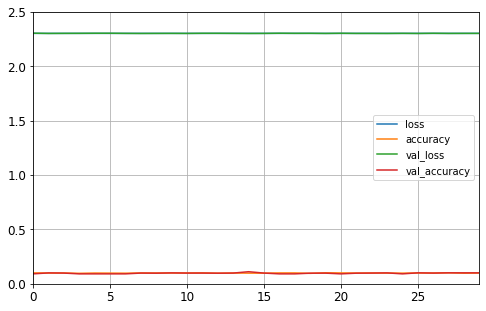

In [81]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history1.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

### 2) Plot learning curves when using different batch size

In [82]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### Batch-size: 12

In [83]:
history4 = model.fit(X_train, y_train, batch_size=12, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
4584/4584 [==============================] - 11s 2ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 2/30
4584/4584 [==============================] - 10s 2ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 3/30
4584/4584 [==============================] - 10s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy: 0.0914
Epoch 4/30
4584/4584 [==============================] - 10s 2ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 5/30
4584/4584 [==============================] - 10s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3030 - val_accuracy: 0.0986
Epoch 6/30
4584/4584 [==============================] - 10s 2ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 7/30
4584/4584 [==============================] - 10s 2ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3029 - val_ac

In [84]:
history4.params

{'verbose': 1, 'epochs': 30, 'steps': 4584}

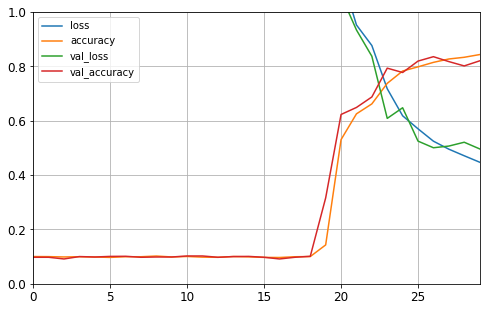

In [85]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [86]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.8019


[0.5389510989189148, 0.8019000291824341]

#### Batch-size: 18

In [87]:
history5 = model.fit(X_train, y_train, batch_size=18, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.4182 - accuracy: 0.8538 - val_loss: 0.4304 - val_accuracy: 0.8448
Epoch 2/30
3056/3056 [==============================] - 8s 2ms/step - loss: 0.4093 - accuracy: 0.8559 - val_loss: 0.4209 - val_accuracy: 0.8532
Epoch 3/30
3056/3056 [==============================] - 8s 2ms/step - loss: 0.3990 - accuracy: 0.8599 - val_loss: 0.4168 - val_accuracy: 0.8564
Epoch 4/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.3901 - accuracy: 0.8613 - val_loss: 0.4193 - val_accuracy: 0.8538
Epoch 5/30
3056/3056 [==============================] - 8s 2ms/step - loss: 0.3826 - accuracy: 0.8648 - val_loss: 0.3920 - val_accuracy: 0.8646
Epoch 6/30
3056/3056 [==============================] - 8s 2ms/step - loss: 0.3739 - accuracy: 0.8674 - val_loss: 0.4191 - val_accuracy: 0.8582
Epoch 7/30
3056/3056 [==============================] - 8s 2ms/step - loss: 0.3678 - accuracy: 0.8694 - val_loss: 0.4418 - val_accuracy:

In [88]:
history5.params

{'verbose': 1, 'epochs': 30, 'steps': 3056}

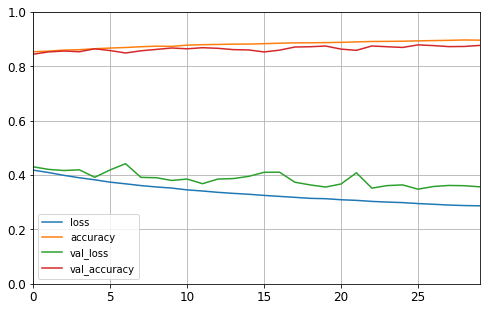

In [89]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [90]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8664


[0.38246670365333557, 0.8664000034332275]

#### Batch-size: 25

In [91]:
history6 = model.fit(X_train, y_train, batch_size=25, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2746 - accuracy: 0.9009 - val_loss: 0.3488 - val_accuracy: 0.8774
Epoch 2/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2738 - accuracy: 0.9012 - val_loss: 0.3494 - val_accuracy: 0.8784
Epoch 3/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2707 - accuracy: 0.9022 - val_loss: 0.3529 - val_accuracy: 0.8814
Epoch 4/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2697 - accuracy: 0.9027 - val_loss: 0.3447 - val_accuracy: 0.8806
Epoch 5/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2685 - accuracy: 0.9027 - val_loss: 0.3484 - val_accuracy: 0.8786
Epoch 6/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2665 - accuracy: 0.9046 - val_loss: 0.3605 - val_accuracy: 0.8780
Epoch 7/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2654 - accuracy: 0.9034 - val_loss: 0.3474 - val_accuracy:

In [92]:
history6.params

{'verbose': 1, 'epochs': 30, 'steps': 2200}

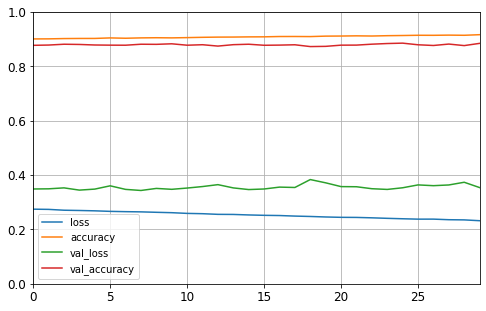

In [93]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [94]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8708


[0.3783349096775055, 0.8708000183105469]

#### Batch-size: 40

In [95]:
history7 = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2209 - accuracy: 0.9210 - val_loss: 0.3423 - val_accuracy: 0.8862
Epoch 2/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2199 - accuracy: 0.9211 - val_loss: 0.3455 - val_accuracy: 0.8858
Epoch 3/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2197 - accuracy: 0.9210 - val_loss: 0.3421 - val_accuracy: 0.8876
Epoch 4/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2178 - accuracy: 0.9219 - val_loss: 0.3465 - val_accuracy: 0.8830
Epoch 5/30
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2170 - accuracy: 0.9222 - val_loss: 0.3489 - val_accuracy: 0.8834
Epoch 6/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2163 - accuracy: 0.9231 - val_loss: 0.3523 - val_accuracy: 0.8826
Epoch 7/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2157 - accuracy: 0.9237 - val_loss: 0.3565 - val_accuracy:

In [96]:
history7.params

{'verbose': 1, 'epochs': 30, 'steps': 1375}

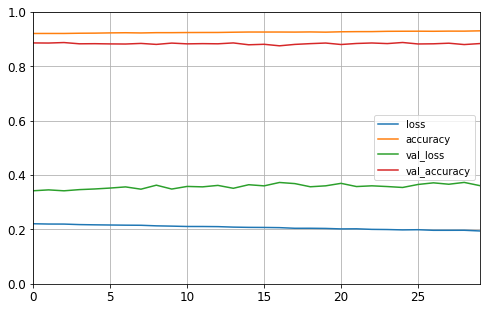

In [97]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [98]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8720


[0.39314624667167664, 0.871999979019165]

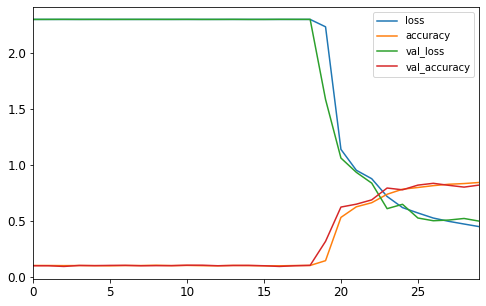

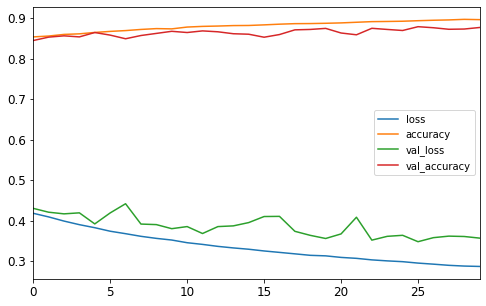

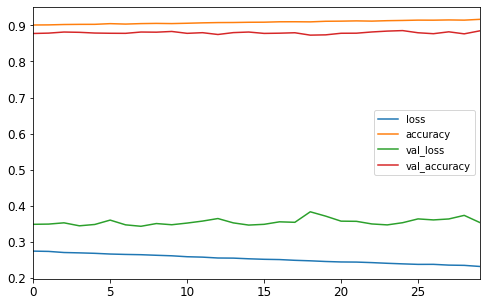

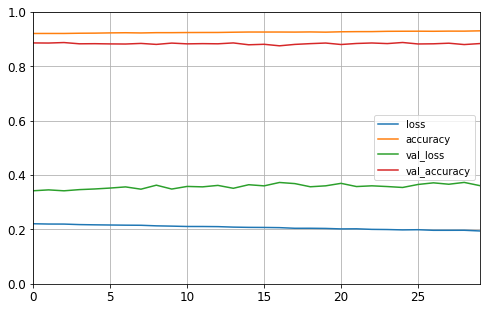

In [99]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 3) Plot learning curves when using different numbers of epochs

#### epochs: 6

In [100]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=6,
                    validation_data=(X_valid, y_valid))

Epoch 1/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2001 - accuracy: 0.9285 - val_loss: 0.3685 - val_accuracy: 0.8818
Epoch 2/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1984 - accuracy: 0.9289 - val_loss: 0.3840 - val_accuracy: 0.8810
Epoch 3/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9279 - val_loss: 0.3795 - val_accuracy: 0.8790
Epoch 4/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1973 - accuracy: 0.9295 - val_loss: 0.3929 - val_accuracy: 0.8738
Epoch 5/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1963 - accuracy: 0.9295 - val_loss: 0.3755 - val_accuracy: 0.8824
Epoch 6/6
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1946 - accuracy: 0.9298 - val_loss: 0.3862 - val_accuracy: 0.8826


In [101]:
history8.params

{'verbose': 1, 'epochs': 6, 'steps': 1719}

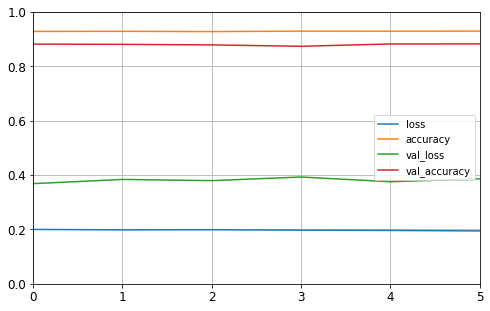

In [102]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [103]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8712


[0.4142615795135498, 0.8712000250816345]

#### epochs: 40

In [104]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1957 - accuracy: 0.9291 - val_loss: 0.3917 - val_accuracy: 0.8748
Epoch 2/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1921 - accuracy: 0.9308 - val_loss: 0.3781 - val_accuracy: 0.8798
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1919 - accuracy: 0.9316 - val_loss: 0.3758 - val_accuracy: 0.8826
Epoch 4/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1921 - accuracy: 0.9311 - val_loss: 0.3784 - val_accuracy: 0.8820
Epoch 5/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1899 - accuracy: 0.9321 - val_loss: 0.3678 - val_accuracy: 0.8852
Epoch 6/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1892 - accuracy: 0.9320 - val_loss: 0.3813 - val_accuracy: 0.8850
Epoch 7/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1886 - accuracy: 0.9328 - val_loss: 0.3743 - val_accuracy:

In [105]:
history9.params

{'verbose': 1, 'epochs': 40, 'steps': 1719}

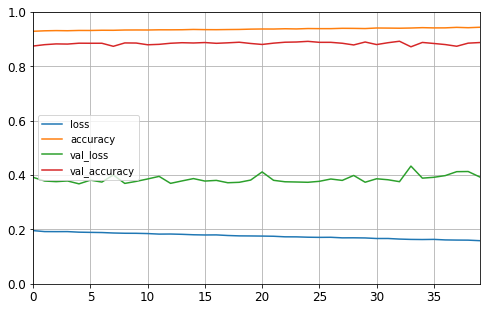

In [106]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [107]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.8692


[0.43586641550064087, 0.8691999912261963]

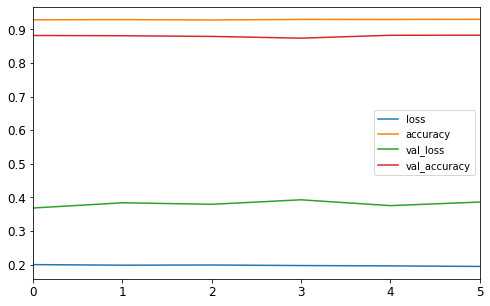

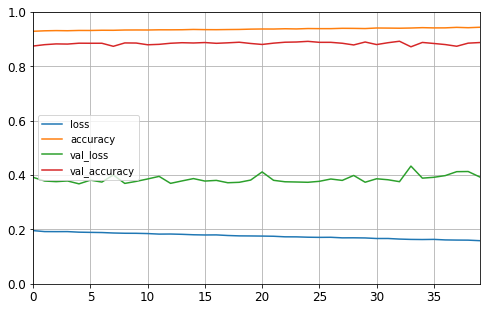

In [108]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
pd.DataFrame(history9.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 4) Repeat with more layers

In [109]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(180, activation="softmax"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [110]:
model.layers

In [111]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [112]:
history11 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7880 - accuracy: 0.3152 - val_loss: 0.9975 - val_accuracy: 0.6678
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.1298 - accuracy: 0.5542 - val_loss: 0.7510 - val_accuracy: 0.7384
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9591 - accuracy: 0.6293 - val_loss: 0.6785 - val_accuracy: 0.7664
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8714 - accuracy: 0.6692 - val_loss: 0.6301 - val_accuracy: 0.7798
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8181 - accuracy: 0.6897 - val_loss: 0.5836 - val_accuracy: 0.7818
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7682 - accuracy: 0.7112 - val_loss: 0.6031 - val_accuracy: 0.7948
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7421 - accuracy: 0.7233 - val_loss: 0.5297 - val_accuracy:

In [113]:
history11.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

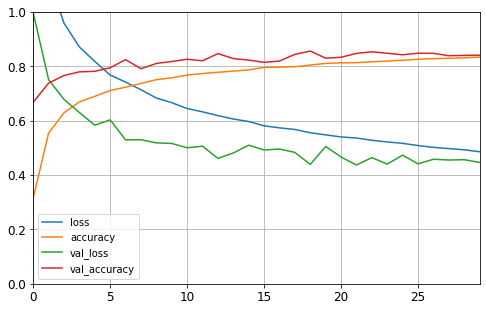

In [114]:
pd.DataFrame(history11.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [115]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4817 - accuracy: 0.8335


[0.48172837495803833, 0.8335000276565552]